In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import pandas as pd
df1 = pd.read_csv("final_all_dataset.csv")

In [45]:
df1

,Time,Speed,Label
0,0.020005,0.000030,0
1,0.040010,0.120060,0
2,0.060015,0.240090,0
3,0.080020,0.360120,0
4,0.100025,0.480150,0
...,...,...,...
287923,79.919980,9.919278,0
287924,79.939985,9.920927,0
287925,79.959990,9.922542,0
287926,79.979995,9.924124,0


# ***Preparing the data***

In [46]:
import numpy as np

y = df1['Label']
df1 = df1.drop("Label", axis=1)
X = np.asarray(df1)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# ***Making the models***

# ***Bidirectional GRU with Multi-head attention***

In [4]:
!pip install keras_multi_head

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, GRU, Bidirectional, Input, GlobalMaxPool2D, SimpleRNN, BatchNormalization

from keras_multi_head import MultiHead

def get_bigrumh(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(MultiHead(Bidirectional(GRU(units=64, return_sequences=True, activation='relu'))))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool2D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [6]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn import metrics
# importing the module
import tracemalloc
from sklearn.metrics import classification_report
start = time()
lr=0.001
opt=tf.keras.optimizers.Adam(lr)
model1 = get_bigrumh(2,opt)
# starting the monitoring
tracemalloc.start()
history = model1.fit(X_train,y1,epochs = 10, batch_size=4096,validation_data=(X_val, y_val1))
yp =model1.predict(X_test)


Epoch 1/10
48/48 [==============================] - 33s 580ms/step - loss: 3.5681 - acc: 0.2132 - val_loss: 1.6422 - val_acc: 0.1762
Epoch 2/10
48/48 [==============================] - 27s 558ms/step - loss: 2.0803 - acc: 0.2162 - val_loss: 1.4323 - val_acc: 0.1764
Epoch 3/10
48/48 [==============================] - 28s 585ms/step - loss: 1.4849 - acc: 0.2299 - val_loss: 1.3720 - val_acc: 0.1479
Epoch 4/10
48/48 [==============================] - 28s 581ms/step - loss: 1.2369 - acc: 0.5110 - val_loss: 1.3520 - val_acc: 0.1589
Epoch 5/10
48/48 [==============================] - 27s 568ms/step - loss: 1.1909 - acc: 0.5385 - val_loss: 1.3443 - val_acc: 0.1652
Epoch 6/10
48/48 [==============================] - 28s 575ms/step - loss: 1.1882 - acc: 0.5385 - val_loss: 1.3432 - val_acc: 0.1678
Epoch 7/10
48/48 [==============================] - 31s 641ms/step - loss: 1.1878 - acc: 0.5385 - val_loss: 1.3135 - val_acc: 0.5397
Epoch 8/10
48/48 [==============================] - 33s 679ms/step - 

435.7862319946289


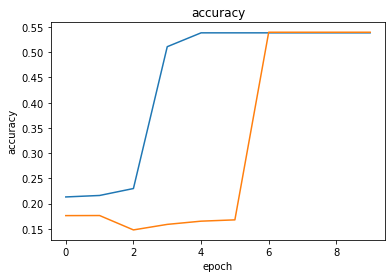

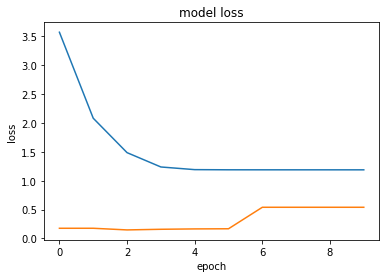

the model is bigru plus multihead attention
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x0000026E6CE89340>
the confusion matrix is [[25621     0     0     0]
 [ 8336     0     0     0]
 [ 6502     0     0     0]
 [ 7050     0     0     0]]


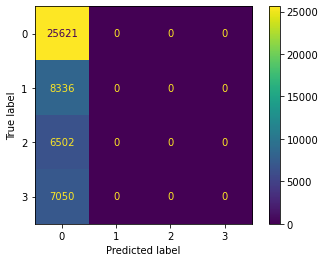

the accuracy for test is is 0.5392872929339704
              precision    recall  f1-score   support

     class 0       0.54      1.00      0.70     25621
     class 1       0.00      0.00      0.00      8336
     class 2       0.00      0.00      0.00      6502
     class 3       0.00      0.00      0.00      7050

    accuracy                           0.54     47509
   macro avg       0.13      0.25      0.18     47509
weighted avg       0.29      0.54      0.38     47509

(16822479, 18122944)


C:\Users\INT004435\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\INT004435\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\INT004435\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_acc'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
  
  
print("the model is bigru plus multihead attention")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Simple RNN***


In [8]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_rnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(SimpleRNN(units=64, return_sequences=True, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model



In [9]:
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn import metrics
# importing the module
import tracemalloc

start = time()
lr=0.001
opt=tf.keras.optimizers.Adam(lr)
model1 = get_rnn(2,opt)
model1.summary()
# starting the monitoring
tracemalloc.start()
history = model1.fit(X_train,y1,epochs = 50, batch_size=1024,validation_data=(X_val,y_val1))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2, 64)             4224      
                                                                 
 batch_normalization_4 (Batc  (None, 2, 64)            256       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 2, 5)              325       
                                                                 
 batch_normalization_5 (Batc  (None, 2, 5)             20        
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 2, 3)              18        
                                                                 
 batch_normalization_6 (Batc  (None, 2, 3)            

189/189 [==============================] - 2s 9ms/step - loss: 0.9612 - acc: 0.5993 - val_loss: 1.0265 - val_acc: 0.5918
Epoch 48/50
189/189 [==============================] - 2s 9ms/step - loss: 0.9623 - acc: 0.5997 - val_loss: 1.0416 - val_acc: 0.5795
Epoch 49/50
189/189 [==============================] - 2s 10ms/step - loss: 0.9641 - acc: 0.5994 - val_loss: 0.9657 - val_acc: 0.5998
Epoch 50/50
189/189 [==============================] - 2s 9ms/step - loss: 0.9650 - acc: 0.5987 - val_loss: 0.9630 - val_acc: 0.5967


81.7356595993042


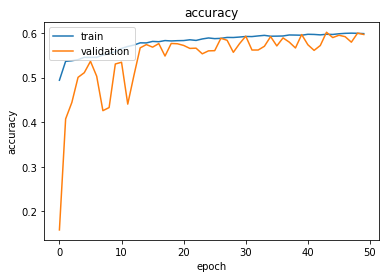

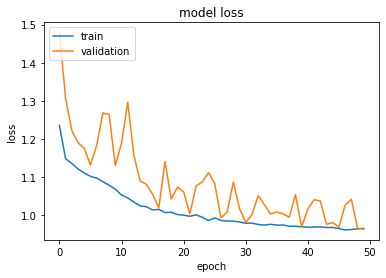

the model is rnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x0000026E6E7E4400>
the confusion matrix is [[24508   817   292     4]
 [ 5065  3036   219    16]
 [ 4711   973   818     0]
 [ 4518  2338   172    22]]


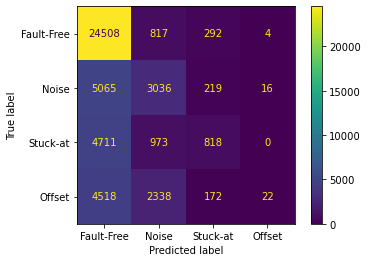

the accuracy for test is is 0.5974446946894273
              precision    recall  f1-score   support

  Fault-Free       0.63      0.96      0.76     25621
       Noise       0.42      0.36      0.39      8336
    Stuck-at       0.54      0.13      0.20      6502
      Offset       0.52      0.00      0.01      7050

    accuracy                           0.60     47509
   macro avg       0.53      0.36      0.34     47509
weighted avg       0.57      0.60      0.51     47509

(9675150, 11219655)


In [10]:
yp =model1.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()
  
  
print("the model is rnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Autoencoder based classifier***

In [47]:
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from sklearn.cluster import SpectralClustering
from time import time
from keras import callbacks
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Input, Dropout
from keras.initializers import VarianceScaling
#from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
import tensorflow as tf

In [48]:
# Building the Input Layer
input_layer = Input(shape =(2, ))
  
# Building the Encoder network
encoded = Dense(4, activation ='relu')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(4, activation ='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(8, activation ='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(4, activation ='relu')(encoded)

  
# Building the Decoder network

decoded = Dense(4, activation ='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(8, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4, activation ='relu')(decoded)
  
# Building the Output Layer
output_layer = Dense(4, activation ='softmax')(decoded)

In [49]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adam", loss ="categorical_crossentropy",metrics='acc')
  
# Training the Auto-encoder network


In [50]:

lr=0.001
opt=tf.keras.optimizers.Adam(lr)
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
# starting the monitoring
tracemalloc.start()
history = autoencoder.fit(X_train,y1,epochs=50, batch_size=512,validation_data=(X_val,y_val1))


Epoch 1/50
377/377 [==============================] - 4s 3ms/step - loss: 1.1771 - acc: 0.5017 - val_loss: 1.2560 - val_acc: 0.5397
Epoch 2/50
377/377 [==============================] - 1s 3ms/step - loss: 1.0927 - acc: 0.5381 - val_loss: 1.3820 - val_acc: 0.5397
Epoch 3/50
377/377 [==============================] - 1s 3ms/step - loss: 1.0455 - acc: 0.5431 - val_loss: 1.4100 - val_acc: 0.4994
Epoch 4/50
377/377 [==============================] - 1s 3ms/step - loss: 1.0341 - acc: 0.5590 - val_loss: 1.4776 - val_acc: 0.4717
Epoch 5/50
377/377 [==============================] - 1s 3ms/step - loss: 1.0264 - acc: 0.5639 - val_loss: 1.4814 - val_acc: 0.4626
Epoch 6/50
377/377 [==============================] - 1s 3ms/step - loss: 1.0235 - acc: 0.5652 - val_loss: 1.4712 - val_acc: 0.4792
Epoch 7/50
377/377 [==============================] - 1s 3ms/step - loss: 1.0219 - acc: 0.5658 - val_loss: 1.5095 - val_acc: 0.4639
Epoch 8/50
377/377 [==============================] - 1s 3ms/step - loss: 1.

12256.63514304161


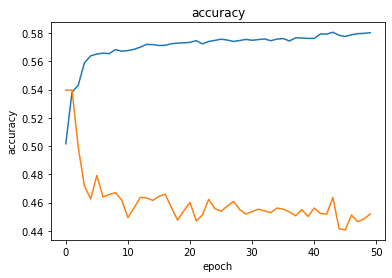

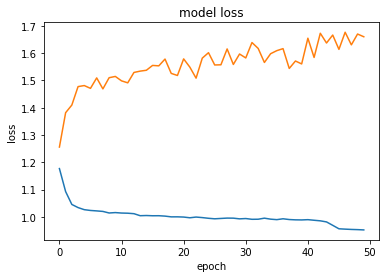

the model is autoencoders
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x0000026E09A873A0>
the confusion matrix is [[24273   625   697     0]
 [ 5027   734  2584     0]
 [ 3193   296  3097     0]
 [ 4456   570  1957     0]]


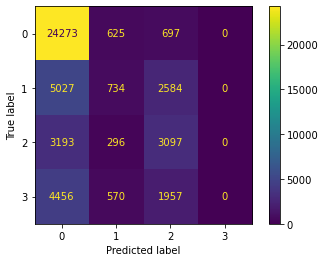

the accuracy for test is is 0.5915510745332463
              precision    recall  f1-score   support

     class 0       0.66      0.95      0.78     25595
     class 1       0.33      0.09      0.14      8345
     class 2       0.37      0.47      0.42      6586
     class 3       0.00      0.00      0.00      6983

    accuracy                           0.59     47509
   macro avg       0.34      0.38      0.33     47509
weighted avg       0.46      0.59      0.50     47509

(10090268, 11628716)


C:\Users\INT004435\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\INT004435\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\INT004435\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
yp =autoencoder.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
  
  
print("the model is autoencoders")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

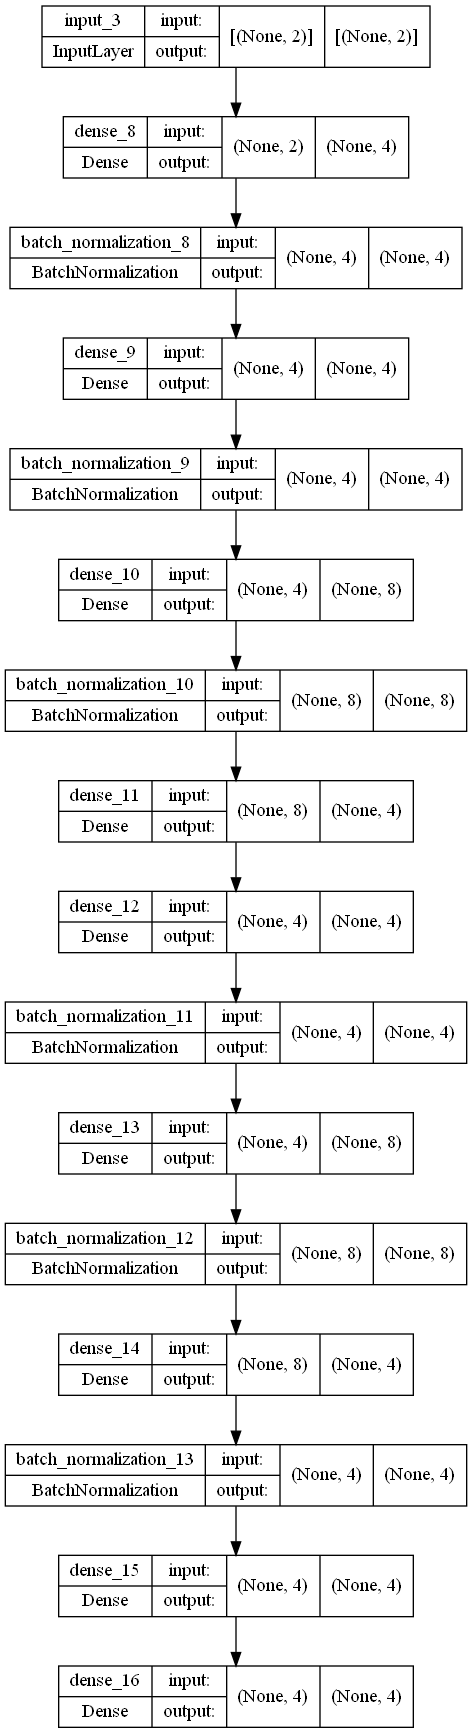

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# ***Transformers based classifier***

In [16]:
from keras import layers
import keras
import tensorflow as tf
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads,
                                             key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)  # self-attention layer
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # layer norm
        ffn_output = self.ffn(out1)  #feed-forward layer
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # layer norm

In [17]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,
                                          output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [18]:
def transatt(input_length, opt):
  embed_dim = 40 # Embedding size for each token
  num_heads = 2  # Number of attention heads
  ff_dim = 3  # Hidden layer size in feed forward network inside transformer

  model = keras.Sequential()
  model.add(layers.Input(shape=(input_length, )))
  model.add(TokenAndPositionEmbedding(input_length, 1000000, embed_dim))
  model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
  model.add(layers.GlobalAveragePooling1D())
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(ff_dim, activation='relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [19]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)
model1 = transatt(2,opt)
# starting the monitoring
tracemalloc.start()
history = model1.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))


Epoch 1/50
95/95 [==============================] - 62s 623ms/step - loss: 1.3553 - acc: 0.5390 - val_loss: 1.3104 - val_acc: 0.5836
Epoch 2/50
95/95 [==============================] - 64s 673ms/step - loss: 1.2874 - acc: 0.5790 - val_loss: 1.2552 - val_acc: 0.5988
Epoch 3/50
95/95 [==============================] - 60s 628ms/step - loss: 1.2366 - acc: 0.5932 - val_loss: 1.2067 - val_acc: 0.6023
Epoch 4/50
95/95 [==============================] - 60s 635ms/step - loss: 1.1873 - acc: 0.6010 - val_loss: 1.1286 - val_acc: 0.6347
Epoch 5/50
95/95 [==============================] - 58s 615ms/step - loss: 1.0914 - acc: 0.6521 - val_loss: 1.0267 - val_acc: 0.6785
Epoch 6/50
95/95 [==============================] - 57s 605ms/step - loss: 1.0217 - acc: 0.6694 - val_loss: 0.9699 - val_acc: 0.6919
Epoch 7/50
95/95 [==============================] - 57s 598ms/step - loss: 0.9732 - acc: 0.6792 - val_loss: 0.9286 - val_acc: 0.6967
Epoch 8/50
95/95 [==============================] - 57s 603ms/step - 

4043.8875226974487


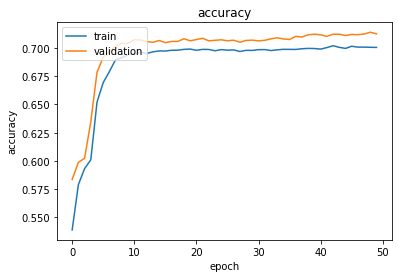

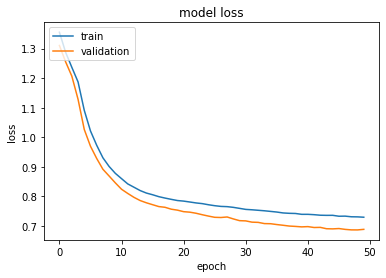

the model is transformers
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x0000026E01572910>
the confusion matrix is [[24683   122   594   222]
 [ 1751  4527  1378   680]
 [ 2367   146  3989     0]
 [ 2388  2860   911   891]]


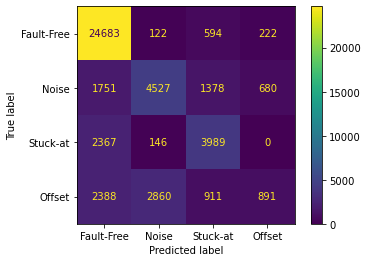

the accuracy for test is is 0.7175482540150288
              precision    recall  f1-score   support

  Fault-Free       0.79      0.96      0.87     25621
       Noise       0.59      0.54      0.57      8336
    Stuck-at       0.58      0.61      0.60      6502
      Offset       0.50      0.13      0.20      7050

    accuracy                           0.72     47509
   macro avg       0.62      0.56      0.56     47509
weighted avg       0.68      0.72      0.68     47509

(0, 0)


In [21]:
yp =model1.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is transformers")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

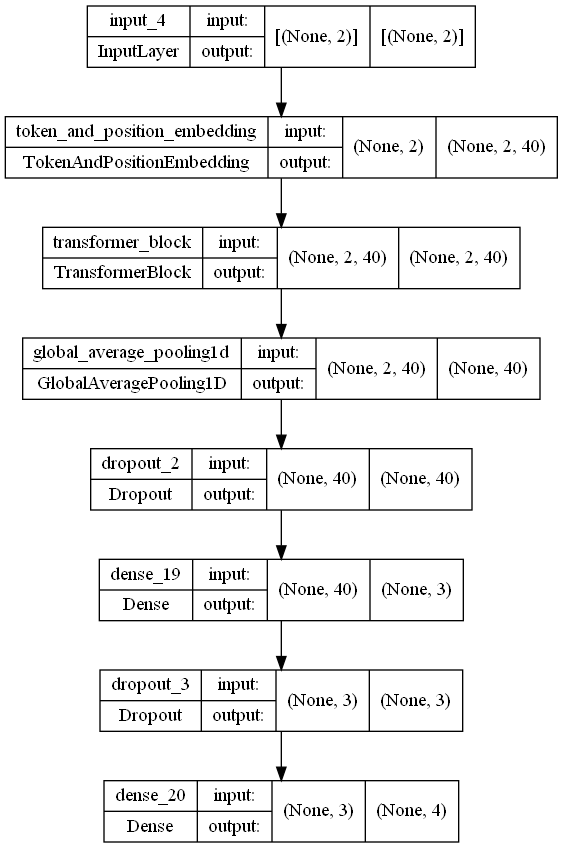

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# ***GRU+Simple RNN***

In [40]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_grurnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(GRU(units=64, return_sequences=True, activation='relu'))
  model.add(SimpleRNN(units=64, return_sequences=True, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model


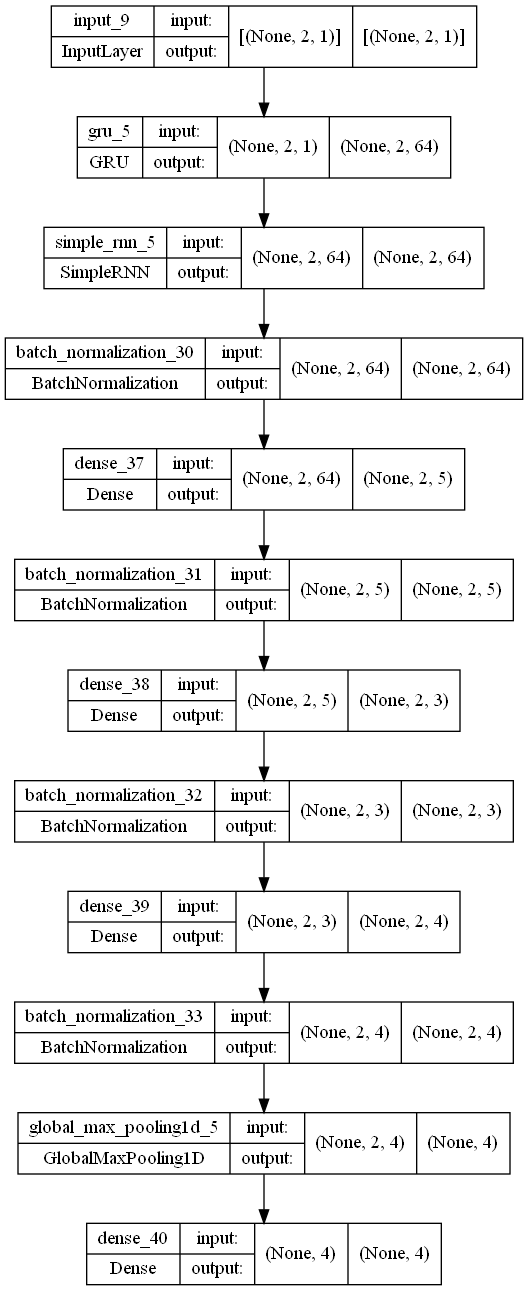

In [43]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [41]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)

# starting the monitoring
tracemalloc.start()
model = get_grurnn(2,opt)
history = model.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))


Epoch 1/50
95/95 [==============================] - 8s 32ms/step - loss: 1.3679 - acc: 0.4643 - val_loss: 1.3511 - val_acc: 0.4188
Epoch 2/50
95/95 [==============================] - 2s 25ms/step - loss: 1.1609 - acc: 0.5272 - val_loss: 1.3025 - val_acc: 0.4729
Epoch 3/50
95/95 [==============================] - 3s 28ms/step - loss: 1.0996 - acc: 0.5556 - val_loss: 1.2538 - val_acc: 0.5125
Epoch 4/50
95/95 [==============================] - 4s 41ms/step - loss: 1.1055 - acc: 0.5531 - val_loss: 1.3101 - val_acc: 0.4272
Epoch 5/50
95/95 [==============================] - 4s 38ms/step - loss: 1.0904 - acc: 0.5625 - val_loss: 1.1945 - val_acc: 0.5338
Epoch 6/50
95/95 [==============================] - 4s 37ms/step - loss: 1.0806 - acc: 0.5670 - val_loss: 1.1750 - val_acc: 0.5350
Epoch 7/50
95/95 [==============================] - 4s 37ms/step - loss: 1.0884 - acc: 0.5612 - val_loss: 1.9470 - val_acc: 0.3591
Epoch 8/50
95/95 [==============================] - 3s 33ms/step - loss: 1.0667 - a

11985.43151140213


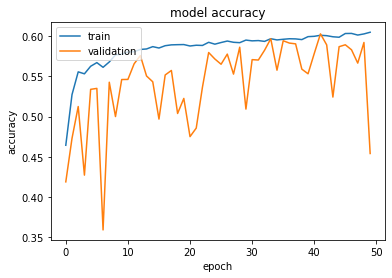

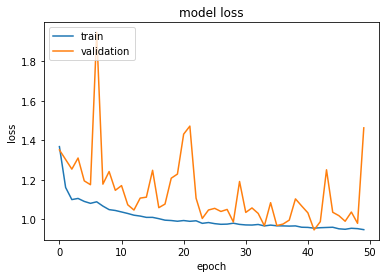

the model is gru+simplernn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x0000026E09D202B0>
the confusion matrix is [[15298  3246  7075     2]
 [ 4006  2936  1390     4]
 [ 2238  1002  3262     0]
 [ 3360  2139  1548     3]]


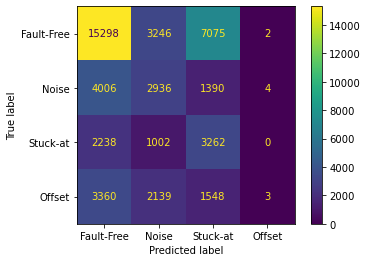

the accuracy is 0.4525247847776211
              precision    recall  f1-score   support

  Fault-Free       0.61      0.60      0.61     25621
       Noise       0.31      0.35      0.33      8336
    Stuck-at       0.25      0.50      0.33      6502
      Offset       0.33      0.00      0.00      7050

    accuracy                           0.45     47509
   macro avg       0.38      0.36      0.32     47509
weighted avg       0.47      0.45      0.43     47509

(14308277, 15846864)


In [42]:
yp =model.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is gru+simplernn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Bidirectional GRU +Bidirectional SimpleRNN***

In [33]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_bigrurnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(Bidirectional(GRU(units=64, return_sequences=True, activation='relu')))
  model.add(Bidirectional(SimpleRNN(units=64, return_sequences=True, activation='relu')))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [34]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)

# starting the monitoring
tracemalloc.start()
model = get_bigrurnn(2,opt)
history = model.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))


Epoch 1/50
95/95 [==============================] - 14s 79ms/step - loss: 1.4622 - acc: 0.3711 - val_loss: 1.6334 - val_acc: 0.3512
Epoch 2/50
95/95 [==============================] - 6s 68ms/step - loss: 1.2756 - acc: 0.5165 - val_loss: 1.2858 - val_acc: 0.4718
Epoch 3/50
95/95 [==============================] - 7s 74ms/step - loss: 1.1941 - acc: 0.5478 - val_loss: 1.1883 - val_acc: 0.5413
Epoch 4/50
95/95 [==============================] - 7s 75ms/step - loss: 1.1035 - acc: 0.5541 - val_loss: 1.1791 - val_acc: 0.5107
Epoch 5/50
95/95 [==============================] - 7s 72ms/step - loss: 1.0472 - acc: 0.5705 - val_loss: 1.1678 - val_acc: 0.5263
Epoch 6/50
95/95 [==============================] - 7s 72ms/step - loss: 1.0238 - acc: 0.5778 - val_loss: 1.1114 - val_acc: 0.5443
Epoch 7/50
95/95 [==============================] - 7s 78ms/step - loss: 0.9953 - acc: 0.5868 - val_loss: 1.2337 - val_acc: 0.5130
Epoch 8/50
95/95 [==============================] - 7s 78ms/step - loss: 0.9766 - 

11676.49609208107


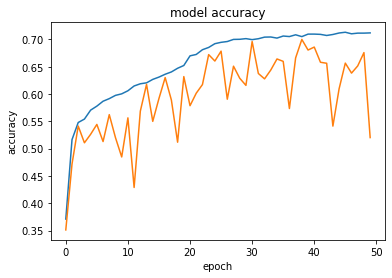

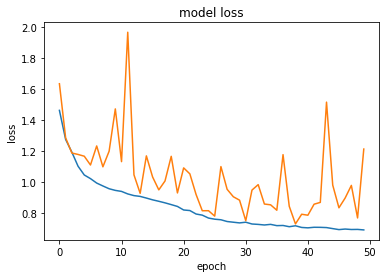

the model is bigru+birnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x0000026E09915CA0>
the confusion matrix is [[15422  3853  5751   595]
 [ 1088  6201   708   339]
 [ 1714  1820  2944    24]
 [ 1228  4824   585   413]]


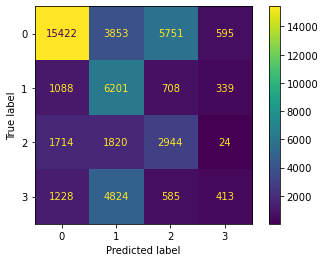

the accuracy is 0.5257951125049991
              precision    recall  f1-score   support

     class 0       0.79      0.60      0.68     25621
     class 1       0.37      0.74      0.50      8336
     class 2       0.29      0.45      0.36      6502
     class 3       0.30      0.06      0.10      7050

    accuracy                           0.53     47509
   macro avg       0.44      0.46      0.41     47509
weighted avg       0.58      0.53      0.52     47509

(0, 0)


In [36]:
yp =model.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
  
  
print("the model is bigru+birnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

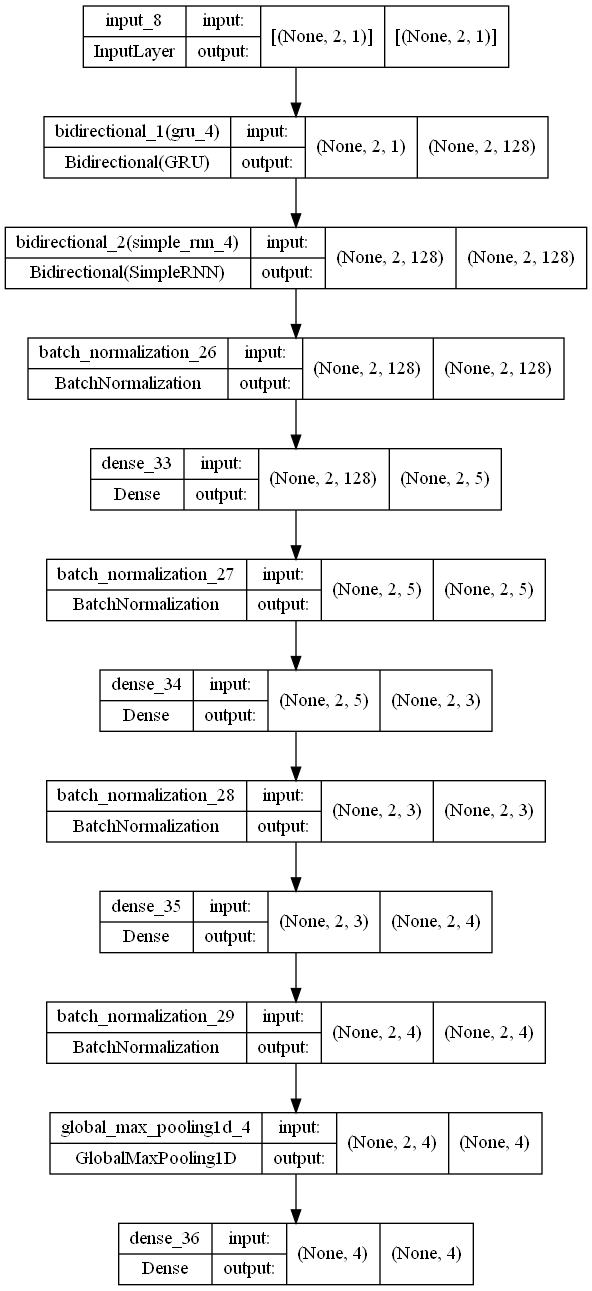

In [37]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)